# BaseBall Case Study

# Project Description

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the datasets given
import requests
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

Except ERA remaining all the columns are of int64 and ERA is Float values

-- Input features-
1.	W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.
2.	R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.
3.	AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.
4.	H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.
5.	2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
6.	3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.
7.	HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.
8.	BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.
9.	SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.
10.	SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.
11.	RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.
12.	ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.
13.	ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.
14.	CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.
15.	SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.
16.	SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.
17.	E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.shape

(30, 17)

There are 30 rows and 17 columns of data in the data set

# EDA

In [8]:
#checking for missing values in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset

In [9]:
df.duplicated().any()

False

In [10]:
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

False

No duplicate rows or  no white spaces present in the dataset

<AxesSubplot:>

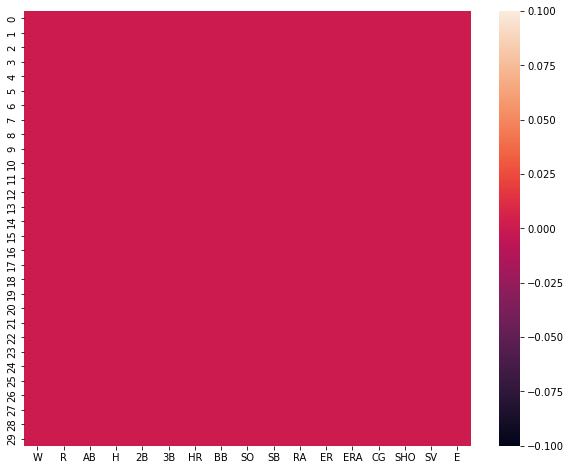

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

There are no null values in the train dataset

In [12]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [13]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [14]:
df['W'].unique

<bound method Series.unique of 0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64>

All the columns have mostly unique vlues and all are numerical type, & there is no categorical values

In [15]:
df.describe().T.style.bar(subset=["mean"],
                        color='#205ff2').background_gradient(subset=['std'],
                                                             cmap='Reds').background_gradient(subset=['50%'],
                                                                                              cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
W,30.000000,80.966667,10.453455,63.000000,74.000000,81.000000,87.750000,100.000000
R,30.000000,688.233333,58.761754,573.000000,651.250000,689.000000,718.250000,891.000000
AB,30.000000,5516.266667,70.467372,5385.000000,5464.000000,5510.000000,5570.000000,5649.000000
H,30.000000,1403.533333,57.140923,1324.000000,1363.000000,1382.500000,1451.500000,1515.000000
2B,30.000000,274.733333,18.095405,236.000000,262.250000,275.500000,288.750000,308.000000
3B,30.000000,31.300000,10.452355,13.000000,23.000000,31.000000,39.000000,49.000000
HR,30.000000,163.633333,31.823309,100.000000,140.250000,158.500000,177.000000,232.000000
BB,30.000000,469.100000,57.053725,375.000000,428.250000,473.000000,501.250000,570.000000
SO,30.000000,1248.200000,103.759470,973.000000,1157.500000,1261.500000,1311.500000,1518.000000
SB,30.000000,83.500000,22.815225,44.000000,69.000000,83.500000,96.500000,134.000000


# VISUALISATION

# Univariate Analysis:

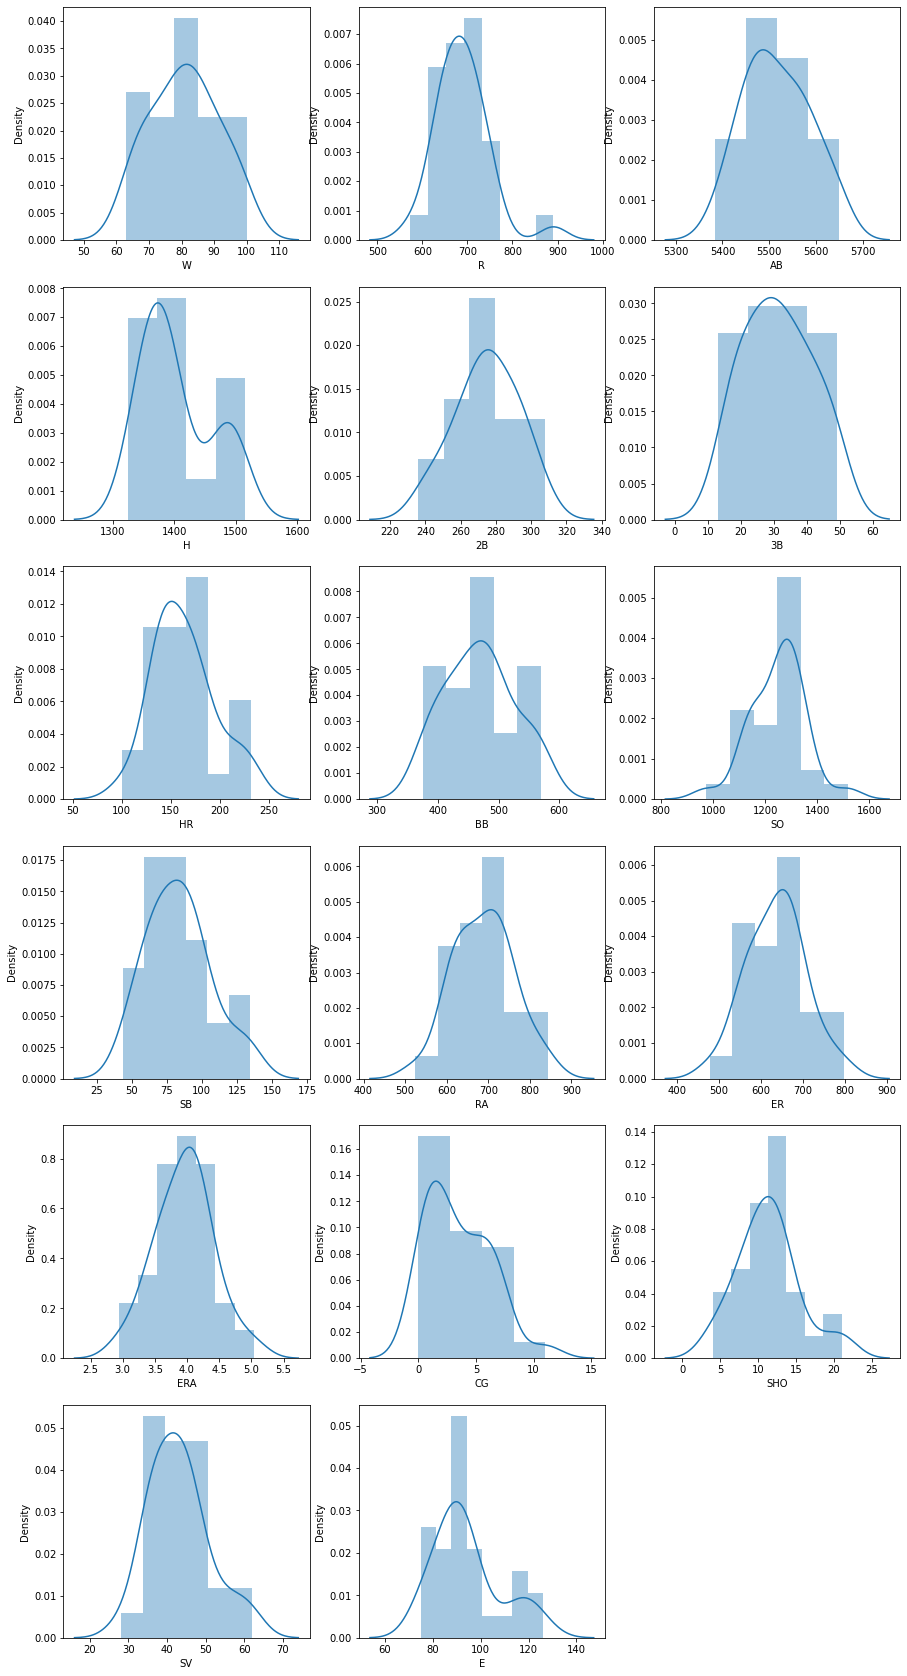

In [16]:
plt.figure(figsize=(15,30))
for i in enumerate(df.columns):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(df[i[1]])

Almost all the attributes are normally distributed.

# Relationship Analysis

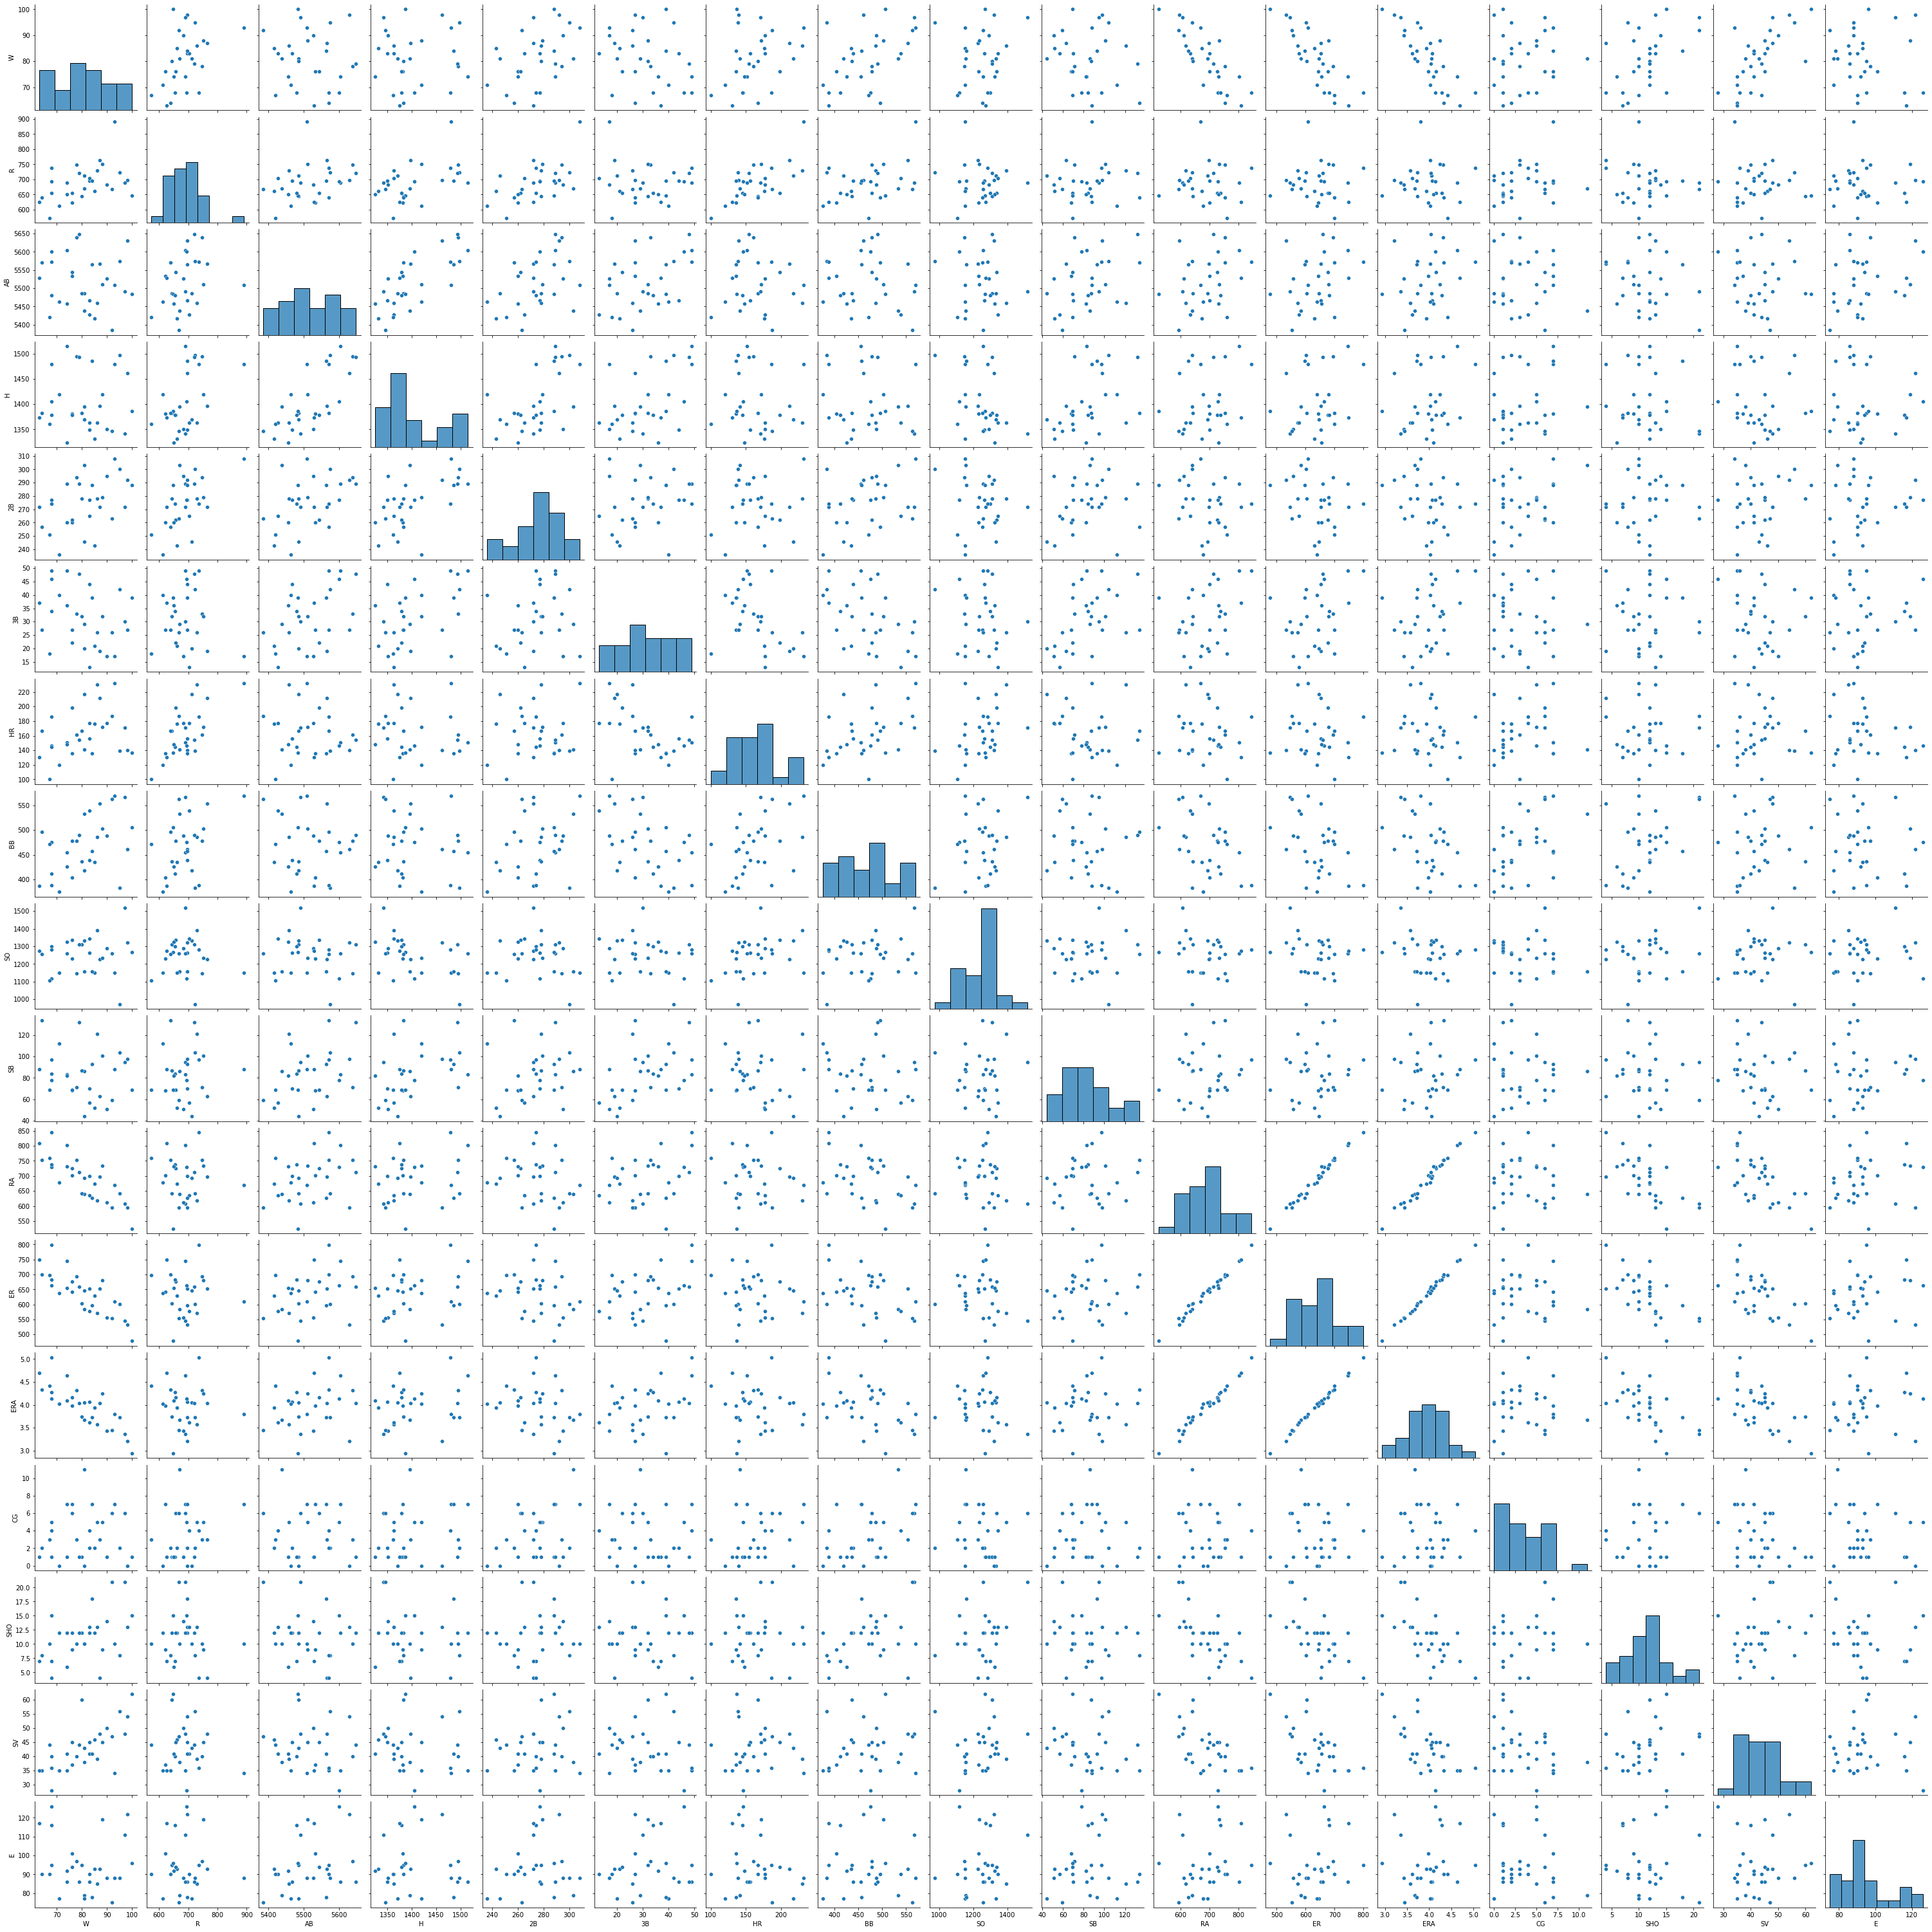

In [17]:
sns.pairplot(df)

In pair plot its not clearly visible about the relation between pair of parameters/attributes

In [18]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

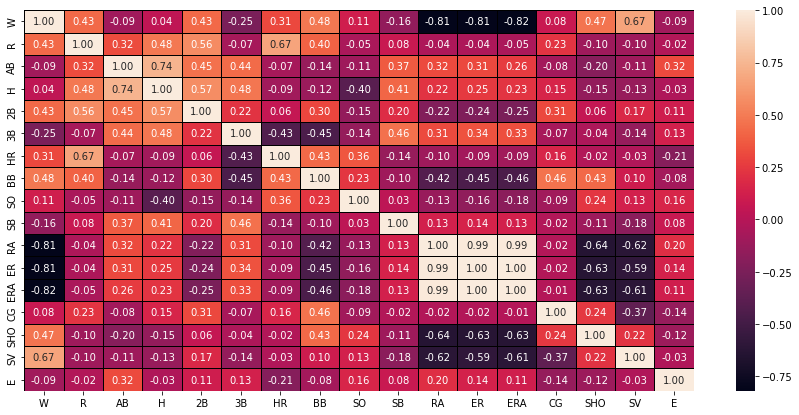

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

As W is our target attribute, Lets check the relation between each attribute with the W

From the above heat map we can clearly see that the W is highly negatively correlated with RA,ER,ERA




SV,SHO,BB,2B,R are correlated postively


3B is Negatively correlated with W

Will check the pair plot relation one by one with respect to "W"

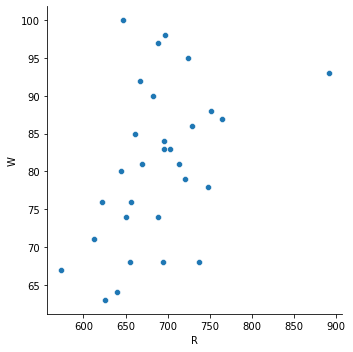

In [20]:
sns.relplot(x="R",y="W",data=df)

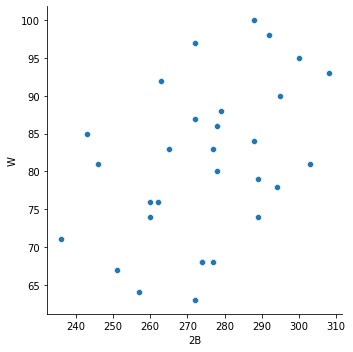

In [21]:
sns.relplot(x="2B",y="W",data=df)

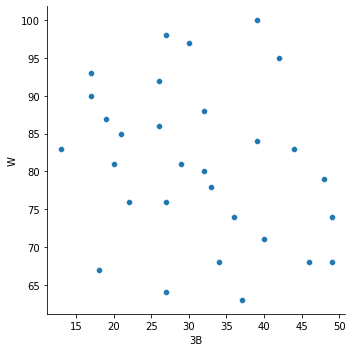

In [22]:
sns.relplot(x="3B",y="W",data=df)

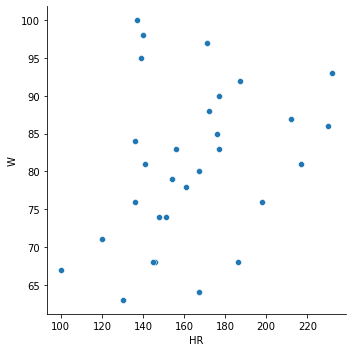

In [23]:
sns.relplot(x="HR",y="W",data=df)

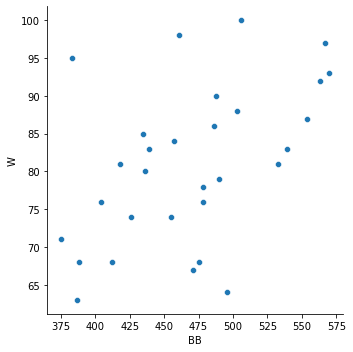

In [24]:
sns.relplot(x="BB",y="W",data=df)

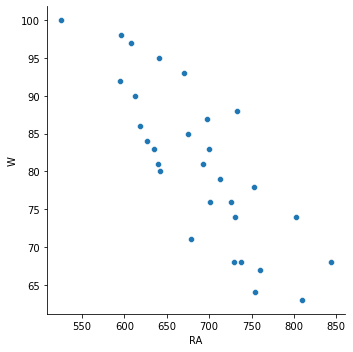

In [25]:
sns.relplot(x="RA",y="W",data=df)

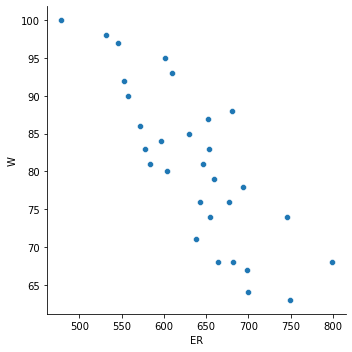

In [26]:
sns.relplot(x="ER",y="W",data=df)

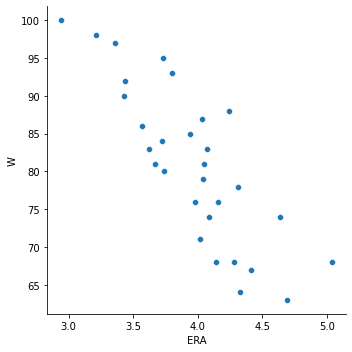

In [27]:
sns.relplot(x="ERA",y="W",data=df)

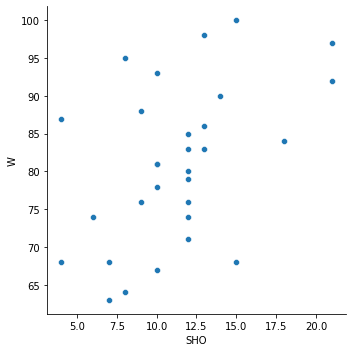

In [28]:
sns.relplot(x="SHO",y="W",data=df)

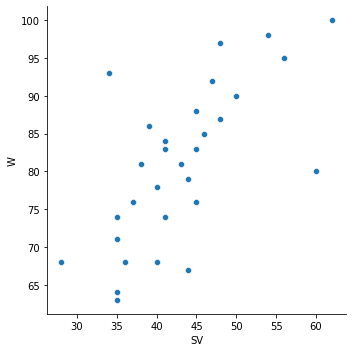

In [29]:
sns.relplot(x="SV",y="W",data=df)

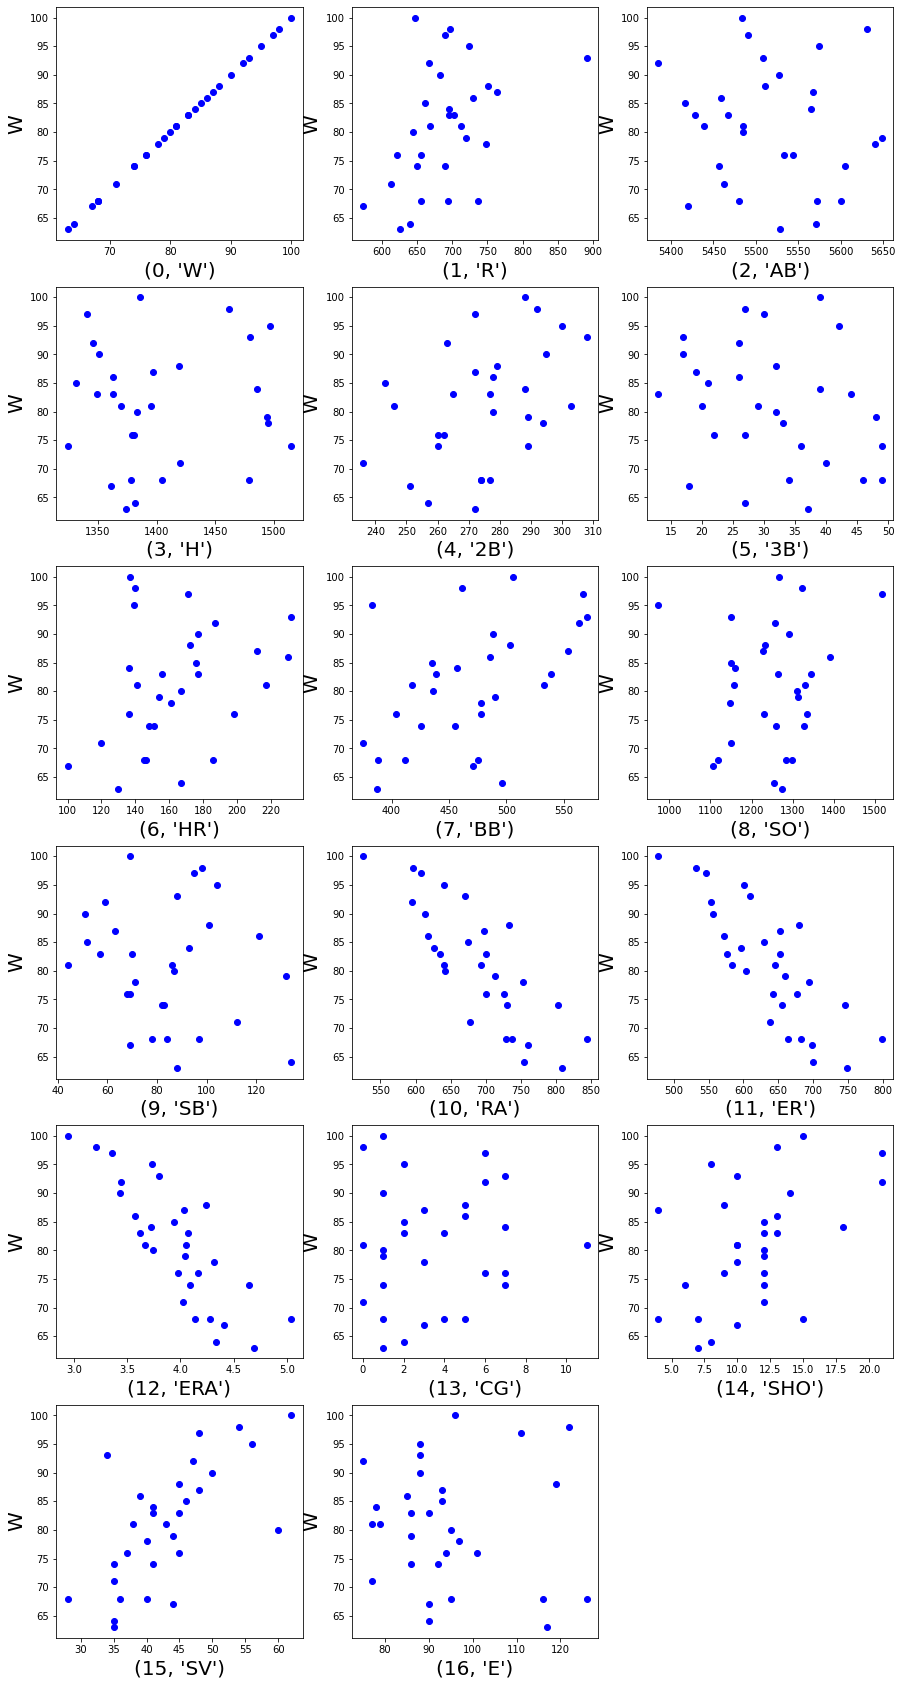

In [30]:
plt.figure(figsize=(15,30))
for i in enumerate(df.columns):
    plt.subplot(6,3,i[0]+1)
    plt.scatter(df[i[1]],df['W'], color='b')
    plt.xlabel(i,fontsize=20)
    plt.ylabel('W', fontsize=20)

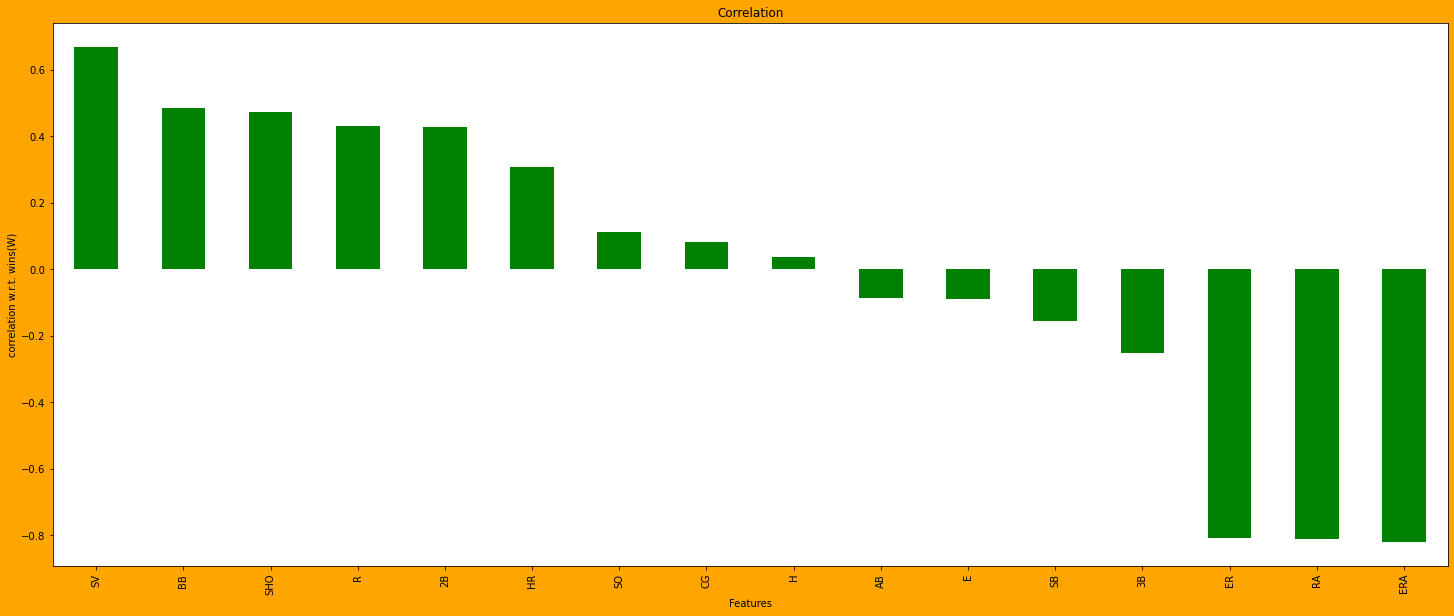

In [31]:
plt.figure(figsize =(25, 10),facecolor = 'orange')
df.corr()['W'].sort_values(ascending = False).drop(['W']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('correlation w.r.t. wins(W)')
plt.title('Correlation')
plt.show()

# Checking for Outliers

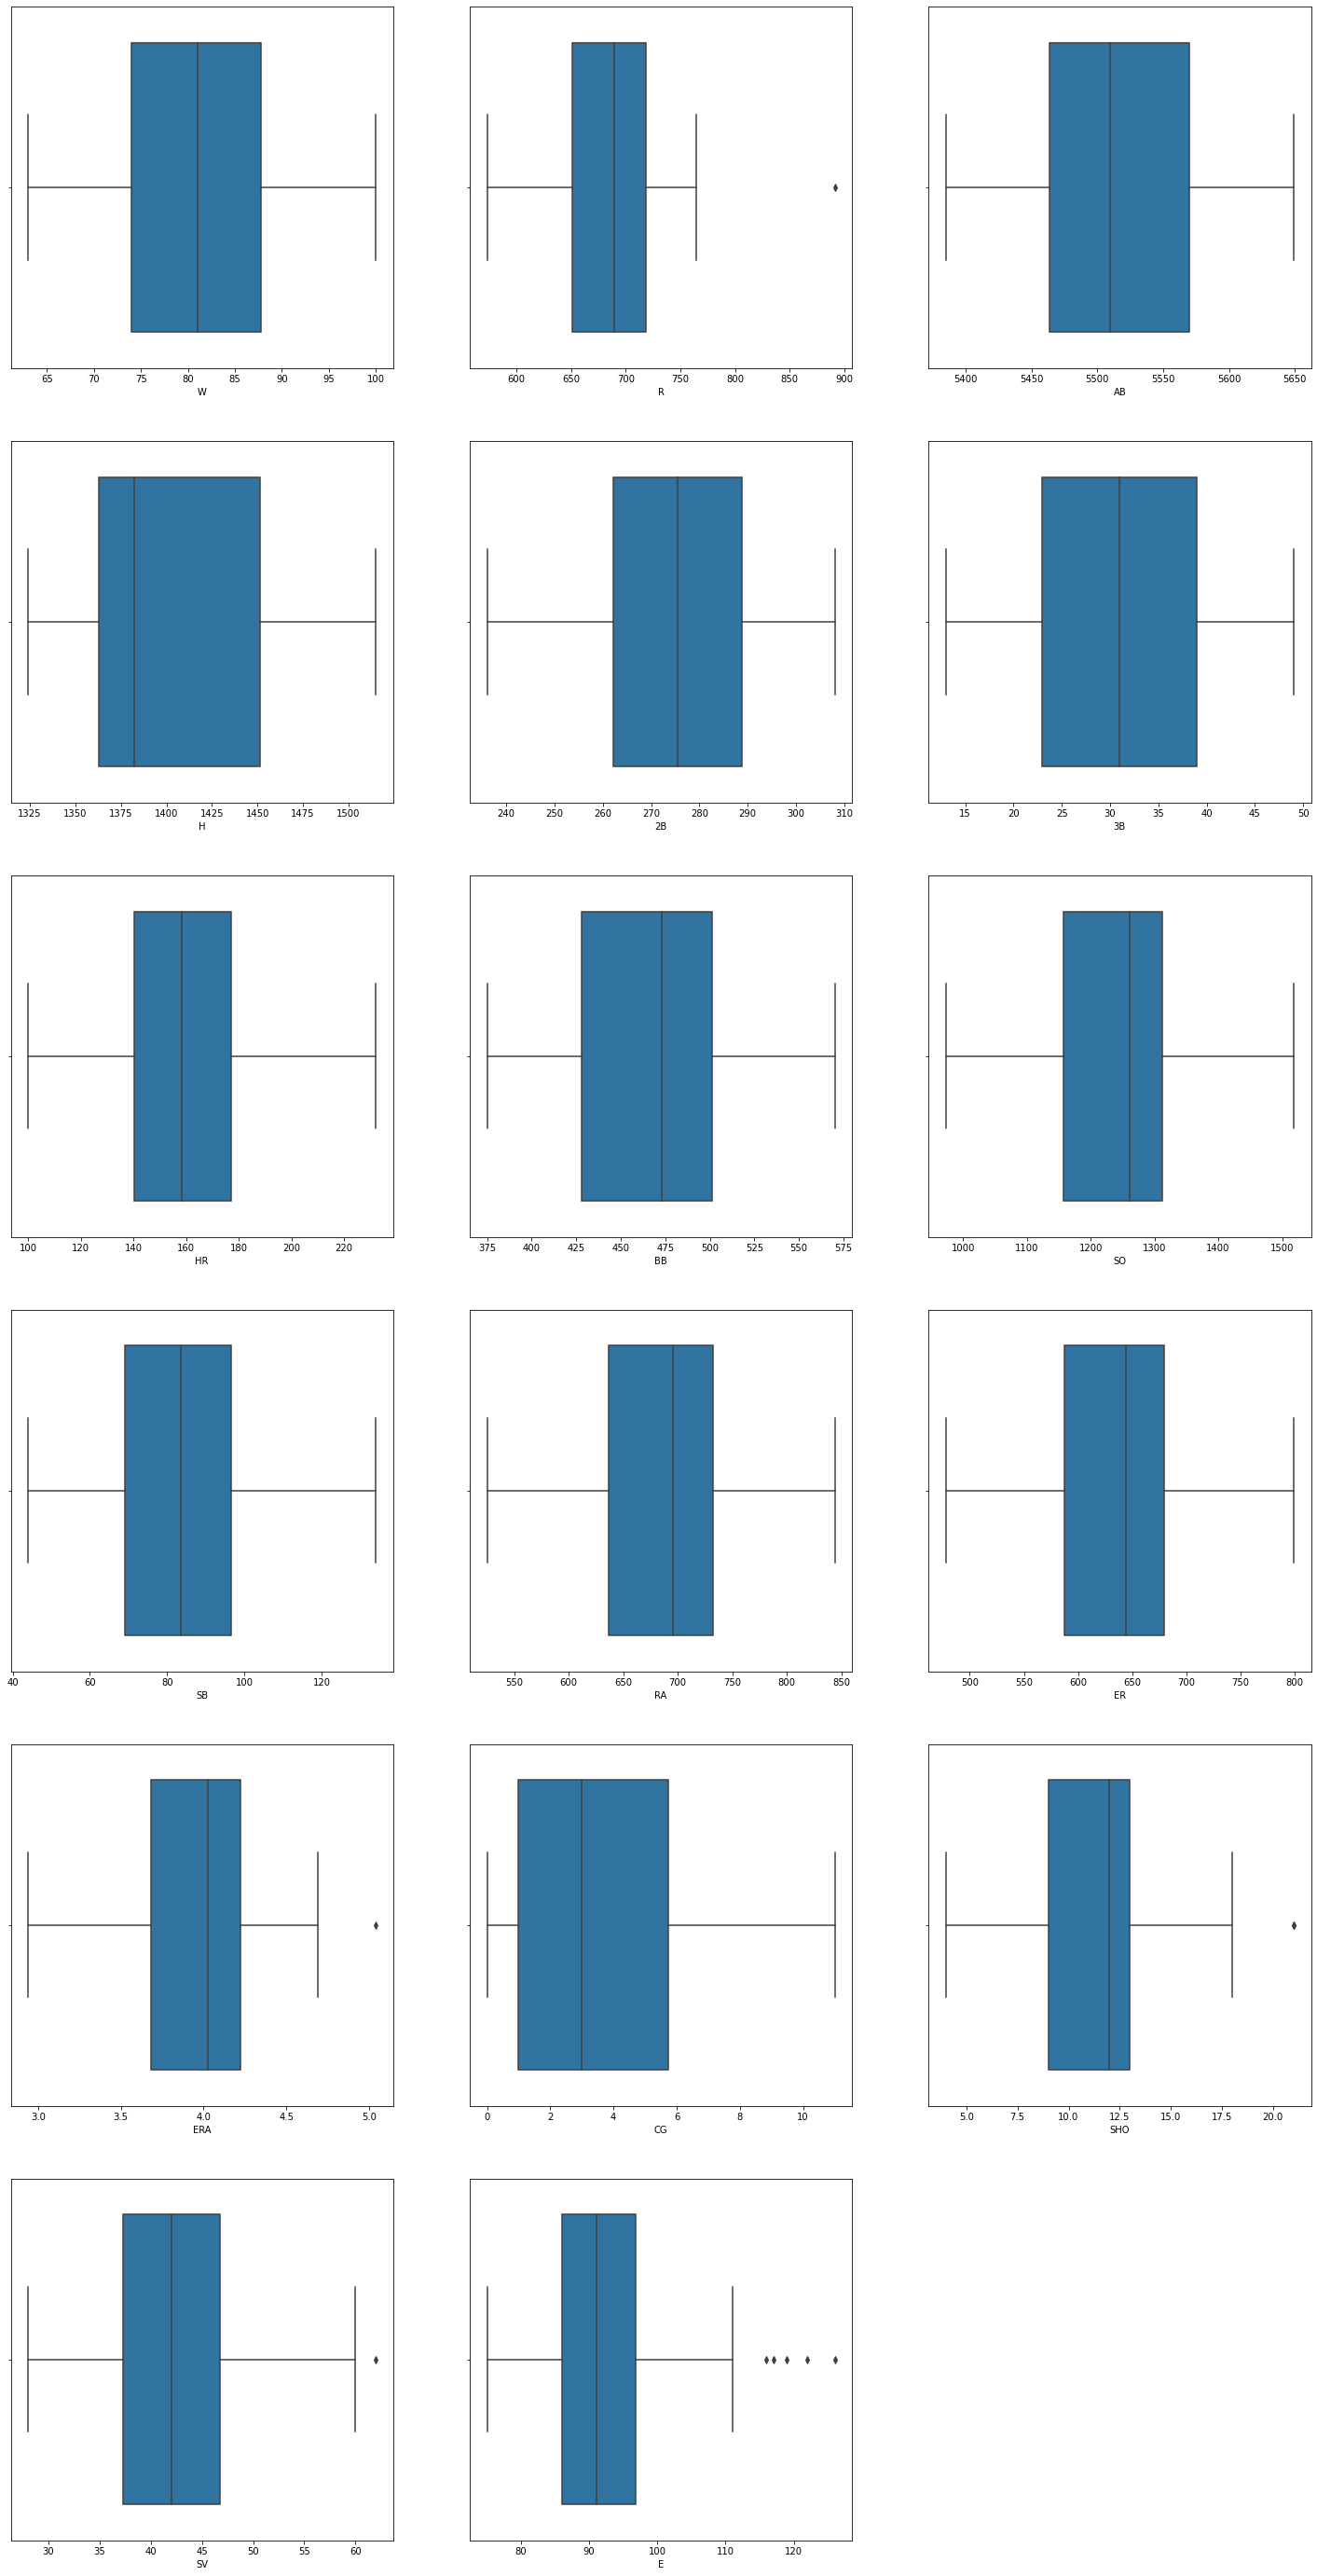

In [32]:
plt.figure(figsize=(25,50))
for i in enumerate(df.columns):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(df[i[1]])

There are outliers in Columns Runs(R),Earned Run average(ERA),Shutout(SHO),Saves(SV),Errors (E)

THere are more outliers in Errors column, when compared to the others.

In [33]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Keeping +/-0.5 as an acceptable range of skewness, the following are out of range:

R,H,HR,SB,CG,SHO,SV,E

In [34]:
x=df.drop("W",axis=1)
y=df['W']

In [35]:
x.shape,y.shape

((30, 16), (30,))

In [36]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(30, 16)

In [37]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [38]:
# Creating new dataframe
dfn = df[(z<3).all(axis=1)]
dfn.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [39]:
dfn.shape

(29, 17)

IN Z Score method One row deleted, where Zscore is >3

In [40]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",dfn.shape)
print("Total Dropped rows:",df.shape[0]-dfn.shape[0])
loss_percent=(df.shape[0]-dfn.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (30, 17)
New DataFrame data in Rows and Column: (29, 17)
Total Dropped rows: 1
3.3333333333333335 %


# IQR Method

In [41]:
#1st quantile
Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

#IQR
IQR=Q3 - Q1
dfs=df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
dfs.shape

(20, 17)

There are 10 rows deleted in the IQR method


In [43]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in IQR Rows and Column:",dfs.shape)
print("Total Dropped rows IN IQR method:",df.shape[0]-dfs.shape[0])
loss_percent=(df.shape[0]-dfs.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (30, 17)
New DataFrame data in IQR Rows and Column: (20, 17)
Total Dropped rows IN IQR method: 10
33.33333333333333 %


Here data loss is 33%, so we will go with the ZSCore method, as the data loss is only 3%

In [44]:
dfn.head(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


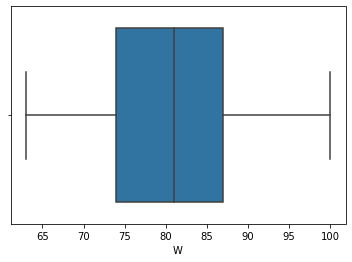

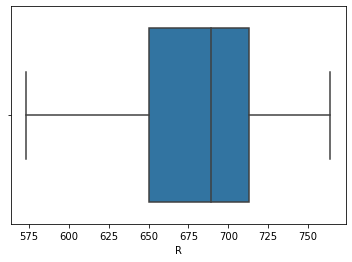

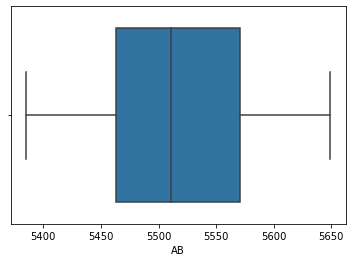

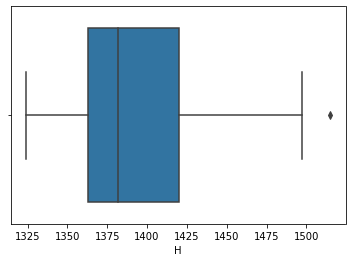

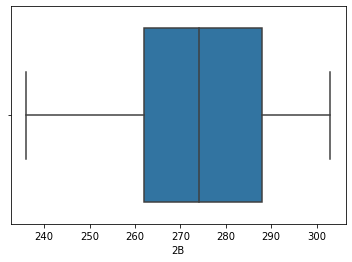

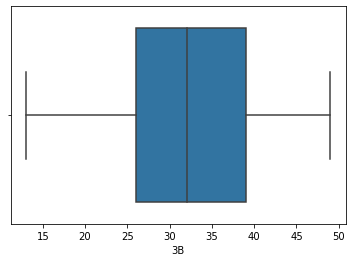

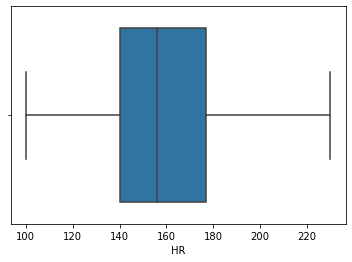

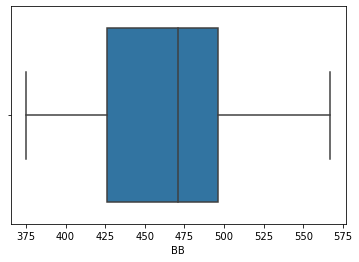

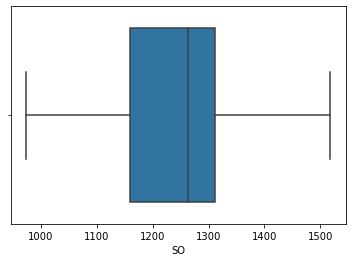

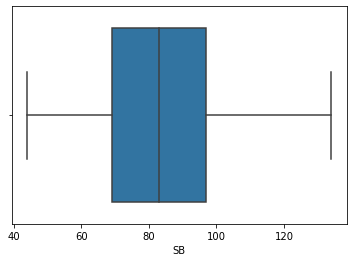

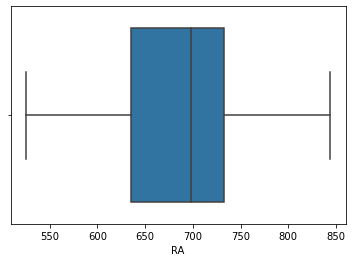

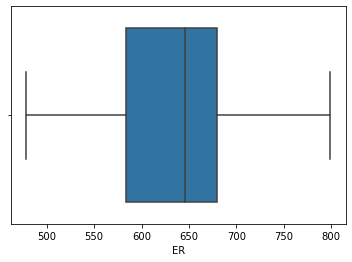

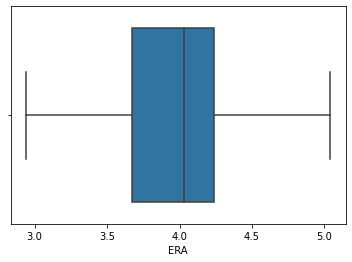

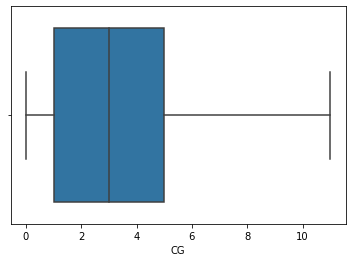

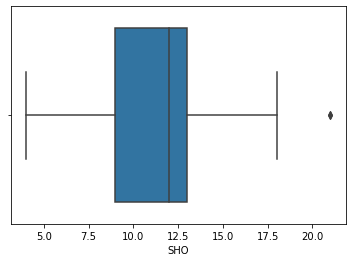

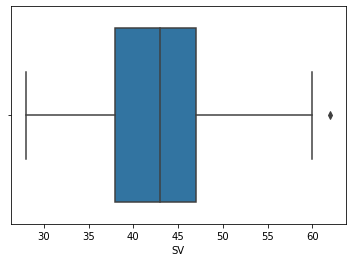

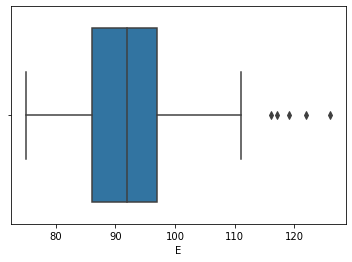

In [45]:
for i in dfn.columns:
    sns.boxplot(dfn[i])
    plt.show()

# Checking for Skewness:

In [46]:
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

We can see that there is skewness in Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).

In [47]:
x1=dfn.drop("W",axis=1)
y1=dfn['W']

In [48]:
#list of skewed features
skew_features=["H","CG","SHO","SV","E"]

In [49]:
#While using yeo johnson method for skewness removal in "H" it became ZERO. all the values became ZERO. SO here we are usig log tranform for H 
#Removing skewness in H using log1p
dfn["H"]=np.log1p(dfn["H"])

In [50]:
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [51]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [52]:
#Removing skewness using yeo-johnson
dfn[['E','SHO','SV','CG']] = scaler.fit_transform(dfn[['E','SHO','SV','CG']].values)

In [53]:
dfn.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Lets visually check the skewness

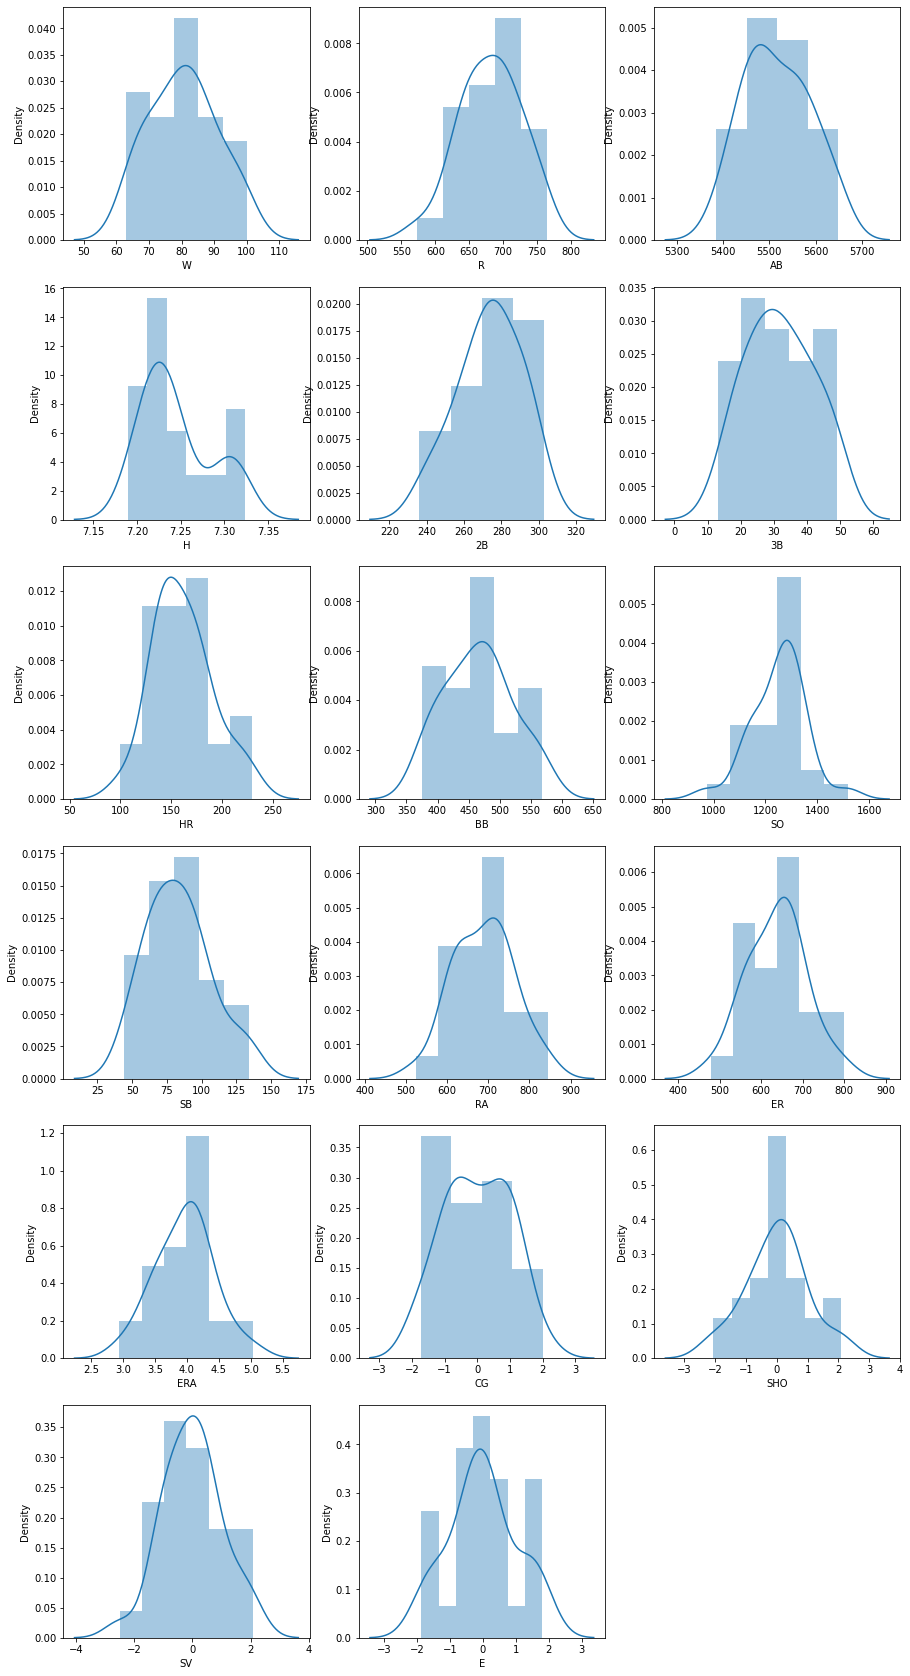

In [54]:
#lets check the skewness using visual method
plt.figure(figsize=(15,30))
for i in enumerate(dfn.columns):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(dfn[i[1]])

# Splitting the data into input & output 

In [55]:
# lets say X will be the input features data and Y as output (W)

x = dfn.drop("W",axis=1)
y = dfn["W"]

# Scaling Data using StandardScaler:

In [56]:
#Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [57]:
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(x), columns=x.columns)

In [58]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


# Variance Inflation Factor:

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,7.112342,R
1,20.237195,AB
2,10.114607,H
3,3.528059,2B
4,3.227808,3B
5,8.736960,HR
6,3.324550,BB
7,2.811546,SO
8,1.955254,SB
9,200.826177,RA


Lets remove the "ER", As its having VIF high

In [60]:
#Droping ER
X = X.drop(["ER"],axis=1)

In [61]:
X.shape

(29, 15)

In [62]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.069116,R
1,7.791456,AB
2,9.340727,H
3,3.227862,2B
4,3.125190,3B
5,7.474108,HR
6,3.323583,BB
7,2.786186,SO
8,1.787493,SB
9,142.535647,RA


Still RA and ERA columns are having high VIF, But as we already removed Earned Runs, Lets remove the RA column for Now

As Earned Runs Average is also important for team Win, as Earned Runs is already removed

In [63]:
#Droping RA
X = X.drop(["RA"],axis=1)

In [64]:
X.shape

(29, 14)

In [65]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,6.050871,R
1,5.138099,AB
2,8.047280,H
3,3.209892,2B
4,3.049068,3B
5,6.291910,HR
6,3.046080,BB
7,2.239867,SO
8,1.750422,SB
9,4.723327,ERA


<AxesSubplot:>

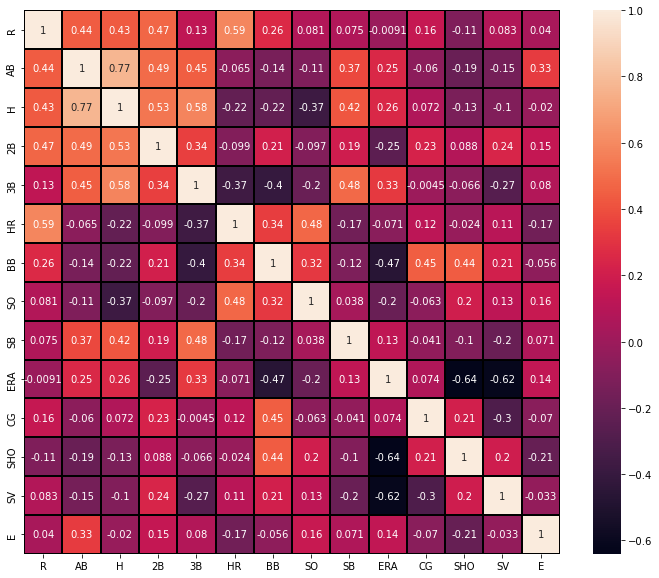

In [66]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True,linecolor='black', linewidths=.25)

Now the Multicollinearity is solved

# Splitting the data for training and testing:

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
LR=LinearRegression()


In [68]:
Y = dfn["W"]

In [69]:
# Train Test Split / finding best random_state for the model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=0.2)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model perform very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('='*50,'\n')

At random state  104 The model perform very well
At random state:  104
Test R2 score is:  0.94
Train R2 score is:  0.94

At random state  141 The model perform very well
At random state:  141
Test R2 score is:  0.93
Train R2 score is:  0.93



Selecting the random state 104

In [70]:
#At Random state= 104

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=104,test_size=0.2)
LR.fit(x_train,y_train)

LinearRegression()

In [71]:
#Importing libraries for other regressions

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [73]:
for i in model:
    i.fit(x_train,y_train)
    print('mean_absolute_error of ',i ,'model', mean_absolute_error(y_test,i.predict(x_test)))
    print('mean_square_error of',i,'model' , mean_squared_error(y_test,i.predict(x_test)))
    print('R2 Score of',i,'model', r2_score(y_test,i.predict(x_test) )*100)
    print('==' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 2.3556176196410425
mean_square_error of LinearRegression() model 7.022346606940793
R2 Score of LinearRegression() model 94.36333382720471


mean_absolute_error of  Ridge() model 2.699774878553292
mean_square_error of Ridge() model 8.300176632045813
R2 Score of Ridge() model 93.33765086390972


mean_absolute_error of  Lasso() model 4.062503167013318
mean_square_error of Lasso() model 21.90747008638624
R2 Score of Lasso() model 82.41540862631204


mean_absolute_error of  DecisionTreeRegressor() model 9.666666666666666
mean_square_error of DecisionTreeRegressor() model 117.0
R2 Score of DecisionTreeRegressor() model 6.086956521739129


mean_absolute_error of  SVR() model 9.889452919028221
mean_square_error of SVR() model 108.7791974419945
R2 Score of SVR() model 12.685594026492709


mean_absolute_error of  KNeighborsRegressor() model 6.400000000000001
mean_square_error of KNeighborsRegressor() model 43.653333333333336
R2 Score of KNeighbors

# Cross VAlidation

In [74]:
from sklearn.model_selection import cross_val_score


for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('=='*50)

mean_square of  LinearRegression() model 7.022346606940793
cross Validation score of  LinearRegression()  is  -30.20877766203634
mean_square of  Ridge() model 8.300176632045813
cross Validation score of  Ridge()  is  -24.28293189495212
mean_square of  Lasso() model 21.90747008638624
cross Validation score of  Lasso()  is  -17.621974908935492
mean_square of  DecisionTreeRegressor() model 117.0
cross Validation score of  DecisionTreeRegressor()  is  -67.63333333333333
mean_square of  SVR() model 108.7791974419945
cross Validation score of  SVR()  is  -98.16982617604087
mean_square of  KNeighborsRegressor() model 43.653333333333336
cross Validation score of  KNeighborsRegressor()  is  -44.738
mean_square of  RandomForestRegressor() model 44.90443333333334
cross Validation score of  RandomForestRegressor()  is  -42.29812499999999
mean_square of  ElasticNet() model 35.68625780910357
cross Validation score of  ElasticNet()  is  -28.532353819860067
mean_square of  SGDRegressor() model 19.4404

In [75]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('=='*50)

Root mean_square of  LinearRegression() model 2.6499710577553093
cross Validation score of root mean square  LinearRegression()  is  5.496251237164868
Root mean_square of  Ridge() model 2.881002712953567
cross Validation score of root mean square  Ridge()  is  4.927771493784196
Root mean_square of  Lasso() model 4.680541644552075
cross Validation score of root mean square  Lasso()  is  4.197853607373117
Root mean_square of  DecisionTreeRegressor() model 10.816653826391969
cross Validation score of root mean square  DecisionTreeRegressor()  is  7.748118051071068
Root mean_square of  SVR() model 10.429726623550327
cross Validation score of root mean square  SVR()  is  9.90806874098282
Root mean_square of  KNeighborsRegressor() model 6.607066923630586
cross Validation score of root mean square  KNeighborsRegressor()  is  6.688647097881604
Root mean_square of  RandomForestRegressor() model 6.701077027861516
cross Validation score of root mean square  RandomForestRegressor()  is  6.43061777

Taking the Lasso Model for consideration

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV
LS_model= Lasso()
parameter = {'alpha':[0.01,0.1,1.0,10.5],
            'selection':['cyclic','random'],
            'max_iter':[2,4,6,8,10],
            'tol':[100,1000],
            'fit_intercept':['bool']}

GCV=GridSearchCV(LS_model,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.5],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [77]:
GCV.best_params_

{'alpha': 0.1,
 'fit_intercept': 'bool',
 'max_iter': 10,
 'selection': 'random',
 'tol': 1000}

In [78]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer


Final_model=Lasso(alpha=0.1, fit_intercept="bool", max_iter=10, selection="random", tol=100)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_Score: 87.25652696722462
mean_squared_error: 15.876243486665999
mean_absolute_error: 2.9882136776928454
RMSE value: 3.984500406157088


Accuracy of 88.27 % is achieved

# Saving The Model

In [79]:
#Saving the model using .pkl
import joblib
joblib.dump(Final_model,"BaseBallCaseStudy.pkl")

['BaseBallCaseStudy.pkl']

# Prediction with Test Dataset

In [80]:
#Loading the saved model
model=joblib.load("BaseballCaseStudy.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([87.68562689, 69.22935682, 66.8542071 , 89.84132964, 77.15965548,
       81.07856661])

In [81]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5
Predicted,87.685627,69.229357,66.854207,89.84133,77.159655,81.078567
Actual,92.000000,64.000000,67.000000,90.00000,76.000000,88.000000


Achieved the pedicted values near the Actual values.